In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./howpop_train.csv")

In [3]:
df.shape

(134137, 17)

In [4]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


In [5]:
df.drop(
    filter(lambda c: c.endswith("_lognorm"), df.columns),
    axis=1,  # axis = 1: столбцы
    inplace=True,)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [7]:
df.describe(include=["object", "bool"]).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/18284/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [8]:
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (15, 5), "axes.titlesize": 18}
)

In [9]:
print(df.published.dtype)
df["published"] = pd.to_datetime(df.published, yearfirst=True)
print(df.published.dtype)

object
datetime64[ns]


In [10]:
df["year"] = [d.year for d in df.published]
df["month"] = [d.month for d in df.published]

df["dayofweek"] = [d.isoweekday() for d in df.published]
df["hour"] = [d.hour for d in df.published]

In [15]:
#В каком месяце (и какого года) было больше всего публикаций?
pd.crosstab(df['year'], df['month'])


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2008,435,496,545,597,635,599,674,677,914,712,661,798
2009,797,812,890,840,755,733,891,956,955,1021,1084,1049
2010,1010,1203,1257,1068,1012,1090,1152,1029,1129,1096,990,1055
2011,1124,1072,1172,1178,1159,1439,1292,1315,1363,1347,1367,1235
2012,1167,1178,1416,1330,1388,1335,1340,1318,1331,1421,1435,1313
2013,1187,1186,1327,1298,1129,1244,1244,1291,1355,1456,1452,1368
2014,1133,1218,1238,1402,1193,1237,1372,1228,1408,1595,1462,1694
2015,1504,1793,2189,2110,1799,2004,2111,1849,1944,2030,2035,2084
2016,1717,1819,2115,1910,1726,1498,1278,1278,1482,1493,0,0


<AxesSubplot:>

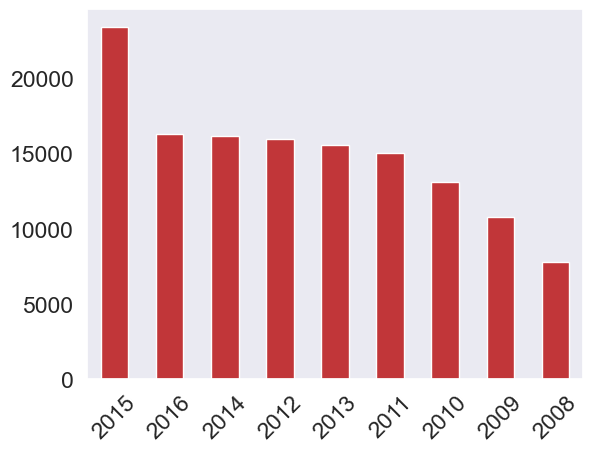

In [27]:

df['year'].value_counts().plot(kind='bar', rot=45)

In [30]:
df[(df['year'] == '2015')].count()


url            0
domain         0
post_id        0
published      0
author         0
flow           0
polling        0
content_len    0
title          0
comments       0
favs           0
views          0
votes_plus     0
votes_minus    0
year           0
month          0
dayofweek      0
hour           0
dtype: int64

In [ ]:
.plot(kind='bar', rot=45)